# <p style="background-color:#a4b5c6; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:95%; padding:30px; line-height:165%;font-weight:  lighter">PyTorch</p>

* __Pytorch is an open-source deep learning framework available with a Python and C++ interface. Pytorch resides inside the torch module. In PyTorch, the data that has to be processed is input in the form of a tensor. 

**The PyTorch gives the two important features:**

* __It provides the n dimension tensor which is similar to numpy.
* __It also provides differences in building and training neural network.

**In PyTorch, there are a few components that are most important and help the torch in implementation.**

**The five most important components of PyTorch are:**

* __Tensor
* __Parameters
* __Modules
* __Variables
* __Functions

**Tensor**: Tensor is an n dimensional array which is similar to the numpy and also an fundamental unit of data which can be number,matrix etc.

**Parameters**: It is used when we want parameter as a tensor of some of the components which is not possible when we use varible.Parameter are basicaly enclosed around the variable.

**Module**: It is defined as component which can carry other modules, parameters etc.Module is also known as a base class of all the neural networks.

**Variables**: Variable is defined as component which is enclosed around the tensor for carrying the gradient.It is present under the torch.autograd.Variable.

**Functions**: It is defines as an expression and the relationship between the tewo variables.It has no memory to store any state.


#### After the initial explanations, we come to the main work

<a id="import"></a>
# <p style="background:#25579f url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:30px 30px; width:80%; padding:30px">Phase A: Importing Libraries</p>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import ToTensor
import torchvision.transforms as tt
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
from torchvision import transforms, utils, datasets, models
from torch.autograd import Variable
from keras.optimizers import Adam
import glob
import os
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pathlib


<a id="import"></a>
# <p style="background:#2cc79f url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:30px 30px; width:80%; padding:30px">Phase B: Importing Datasets</p>

In [2]:
path = pathlib.Path("/kaggle/input/rice-image-dataset/Rice_Image_Dataset")

In [3]:
arborio = list(path.glob('Arborio/*'))
basmati = list(path.glob('Basmati/*'))
ipsala = list(path.glob('Ipsala/*'))
jasmine = list(path.glob('Jasmine/*'))
karacadag = list(path.glob('Karacadag/*'))

total_list=arborio + basmati + ipsala + jasmine + karacadag

<a id="import"></a>
# <p style="background:#299ccf url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:30px 30px; width:80%; padding:30px">Phase C: Train & Test Definition</p>

* __The photos we have are 250 x 250 pixels and each one is 3D. We have a total of 75,000 photos, which are divided into 15,000 collections

In [4]:
data_transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor()
    ]
)

model_dataset = datasets.ImageFolder(path, transform=data_transform) 

image, label = model_dataset[0]
print(f"Image Size: {image.shape}")
print(f"Label: {label}")
print(image)

Image Size: torch.Size([3, 250, 250])
Label: 0
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


* __We write the operation that we will do on the image with **transforms.Compose**.

* __**Resize** -> We make our image 100x100, this gives us speed in terms of processing power.

* __**RandomHorizontalFlip** -> Gives random angles to the image

* __**ToTensor** -> converts image to tensor (tensors are like numpy but more useful for multidimensional operations)

* __**ImageFolder**: It allows us to combine the conversion process with our image and divide them into 5 classes.

In [5]:
data_transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize((100,100)),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(
            mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5]
        ),
    ]
)
BATCH_SIZE=256

model_dataset = datasets.ImageFolder(path, transform=data_transform) 
train_count = int(0.7 * len(total_list)) 
valid_count = int(0.2 * len(total_list))
test_count = len(total_list) - train_count - valid_count
train_dataset, valid_dataset, test_dataset = torch.utils.data.random_split(model_dataset, (train_count, valid_count, test_count))
train_dataset_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)  
valid_dataset_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=True) 
test_dataset_loader  = torch.utils.data.DataLoader(test_dataset , batch_size=BATCH_SIZE, shuffle=False)
dataloaders = {'train': train_dataset_loader, 'val': valid_dataset_loader, 'test': test_dataset_loader}

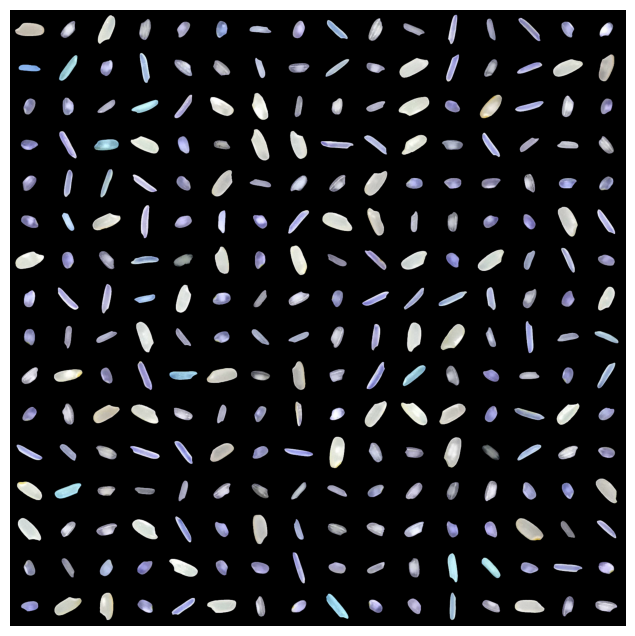

In [6]:
for item in train_dataset_loader:
    plt.figure(figsize=(16, 8))
    image, _ = item
    plt.imshow(make_grid(image, nrow=16).permute(1, 2, 0))
    plt.axis("off")
    plt.show()
    break

<a id="import"></a>
# <p style="background:#45b7ff url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:80%; padding:30px">Phase D: Model Creating </p>

**When writing a convolutional network, the issue we should pay attention to is the number of inputs and hidden layers. By increasing this number, the processing load of training increases.**

* __**Conv2d** --> is a module that takes our layers to the hidden layer. kernel_size is the size of the filtering kernel, here we have chosen the 3e3 kernel

* __**BatchNorm2d** --> Usually used after conv2d, used to normalize batches.

* __**Relu**--> activation function. To enhance the non-linearity feature

* __**Maxpool2d**--> is a layer that re-routes the images with the collected data and converts them to a smaller output.

* __**fc (fully connected layer)** --> is the layer that transforms the data from the hidden layers to the output we need. By viewing, the size and handle of the last layer are multiplied and smoothed, then exported to fc and output.

In [7]:
class CustomizedConvNet(nn.Module):
    def __init__(self,number_of_classes):
        super().__init__() #Inheritance
        
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=12,padding=1,kernel_size=3)
        self.bn1=nn.BatchNorm2d(num_features=12)
        self.relu1=nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        
        self.conv2 = nn.Conv2d(in_channels=12,out_channels=20,padding=1,kernel_size=3)
        self.bn2=nn.BatchNorm2d(num_features=20)
        self.relu2=nn.ReLU()
        
        self.conv3 = nn.Conv2d(in_channels=20,out_channels=32,padding=1,kernel_size=3)
        self.bn3=nn.BatchNorm2d(num_features=32)
        self.relu3=nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2)
        

        self.fc1=nn.Linear(32*25*25, 5)

    
    def forward(self, Input):
        
        output=self.conv1(Input)
        output=self.bn1(output)
        output=self.relu1(output)
        output=self.pool1(output)
        
        output=self.conv2(output)
        output=self.bn2(output)
        output=self.relu2(output)
        
        output=self.conv3(output)
        output=self.bn3(output)
        output=self.relu3(output)
        output=self.pool3(output)
    
        
        output = torch.flatten(output, 1)
        output = output.view(-1,32*25*25)
        output=self.fc1(output)

        
        return output

**Machines use a processor (cpu) or graphics card (gpu) when learning.**

**GPU works faster than CPU, but not every machine has gpu or even if it does, it's not usable. Kaggle, where we write the paper, provides us with a gpu.**

In [8]:
model = CustomizedConvNet(5)
device='cuda'
model = model.to(device)
model

CustomizedConvNet(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (conv3): Conv2d(20, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=20000, out_features=5, bias=True)
)

<a id="import"></a>
# <p style="background:#ffb7ff url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:80%; padding:30px">Phase E: Training the Model</p>

In [9]:
def accuracy(pred, label):
    _, out = torch.max(pred, dim=1)
    return torch.tensor(torch.sum(out == label).item()/len(pred))

def validation_step(valid_dl, model, loss_fn):
    for image, label in valid_dl:
        out = model(image)
        loss = loss_fn(out, label)
        acc = accuracy(out, label)
        return {"val_loss": loss, "val_acc": acc}
def fit_to_model(train_dl, valid_dl, epochs, optimizer, loss_fn, model):
    history = []
    for epoch in range(epochs):
        for image, label in train_dl:
            out = model(image)
            loss = loss_fn(out, label)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            
        val = validation_step(valid_dl, model, loss_fn)
        print(f"Epoch [{epoch}/{epochs}] => loss: {loss}, val_loss: {val['val_loss']}, val_acc: {val['val_acc']}")
        history.append({"loss": loss, 
                        "val_loss": val['val_loss'], 
                        "val_acc": val['val_acc']
                       })
    return history
def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
    
    def __iter__(self):
        for x in self.dl:
            yield to_device(x, self.device)

            


In [10]:

train_dataset_loader= DeviceDataLoader(train_dataset_loader, device)
valid_dataset_loader = DeviceDataLoader(valid_dataset_loader, device)

In [11]:
Loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
epochs = 5
history = fit_to_model(train_dataset_loader, valid_dataset_loader, epochs, optimizer, Loss, model)

Epoch [0/5] => loss: 0.057915717363357544, val_loss: 0.03687121346592903, val_acc: 0.99609375
Epoch [1/5] => loss: 0.036883704364299774, val_loss: 0.032764073461294174, val_acc: 0.98828125
Epoch [2/5] => loss: 0.0040063210763037205, val_loss: 0.010590837337076664, val_acc: 1.0
Epoch [3/5] => loss: 0.010995856486260891, val_loss: 0.018860971555113792, val_acc: 0.9921875
Epoch [4/5] => loss: 0.002267013071104884, val_loss: 0.01623411476612091, val_acc: 0.9921875


<a id="import"></a>
# <p style="background:#ffbbaa url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:80%; padding:30px">Phase F: Testing the Model </p>

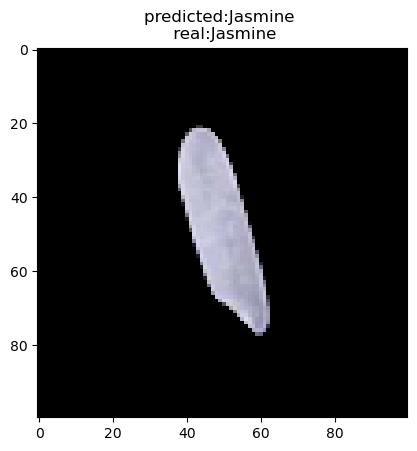

In [12]:
model = model.cpu()
with torch.no_grad():
    
    for img,label in test_dataset_loader:
        imgs = img[10]
        labels = label[10]
        output_model = imgs.unsqueeze(0)
        output_model = model(output_model)
        index = output_model.argmax()
        imgs = torch.permute(imgs,(1,2,0))
        plt.imshow(imgs)
        plt.title(f"predicted:{ model_dataset.classes[index]} \n real:{ model_dataset.classes[labels]}")
        break